In [27]:
import matplotlib.pyplot as plt
import numpy as np

This notebook examines multipliers and roi, as a function of demand and utility, for a SLA protocol in which distinct classes exist with multipliers parameterised in terms of demand and utility as follows:
- multiplier_i = max(min_multiplier, max_multiplier * utilitisation_i * demand_i / demand)
- where demand = demand_1 + demand_2 + ... demand_n
- where utilitisation_i exists in [0,1]

This is set out for a minimmal example of 2 SLA classes. 

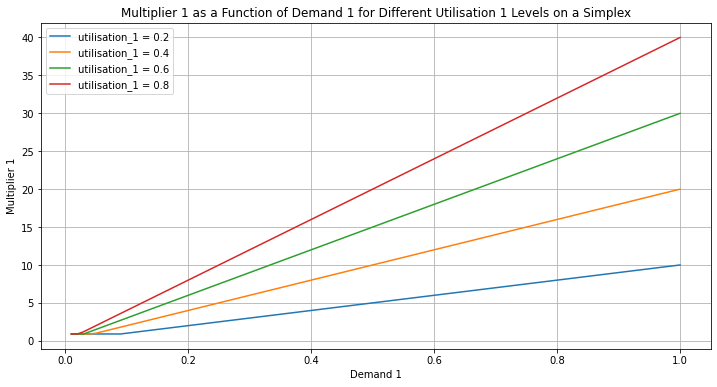

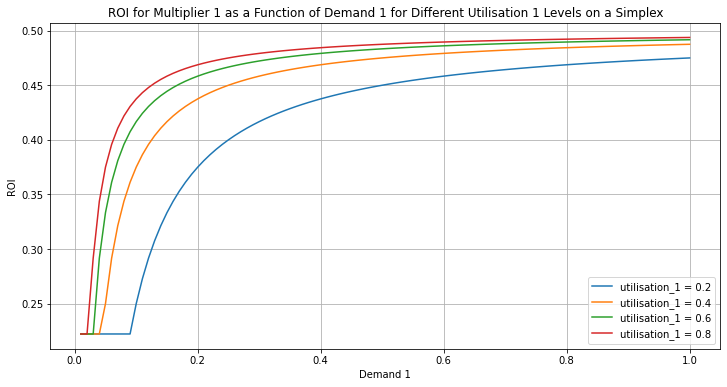

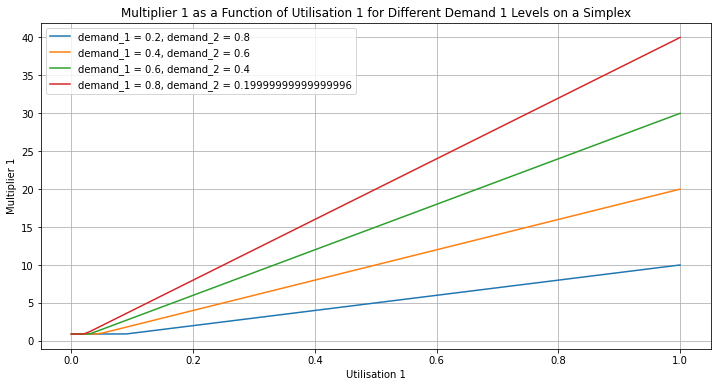

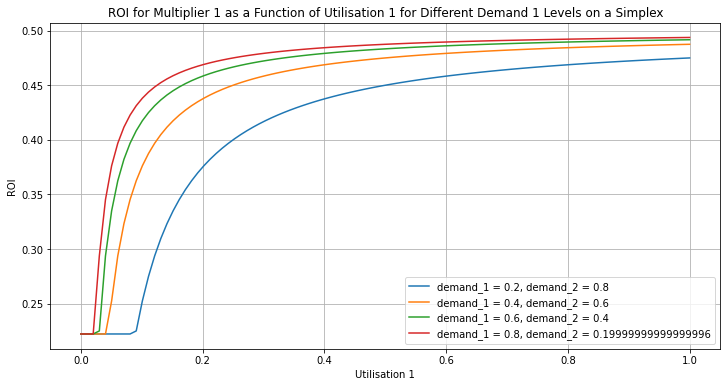

In [28]:
# Parameters
max_multiplier = 50 #tbd, adapt as needed
min_multiplier = 0.9 # tbd, adapt as needed
rewards = 0.1 # based on today, roughly, adapt as needed
cost = 0.05 # based on today, roughly, adapt as needed
pledge = 0.2 # based on today, roughly, adapt as needed

# Define the multiplier and ROI functions 
def calculate_multiplier_1(utilisation_1, demand_1, demand_2):
    demand = demand_1 + demand_2
    return np.maximum(min_multiplier, max_multiplier * utilisation_1 * demand_1 / demand)

def roi(multiplier):
    return (multiplier * rewards - cost) / (pledge * multiplier)

# 1) Plot Multiplier 1 as a function of demand_1 for different utilisation_1 levels
demand_1_values = np.linspace(0.01, 1, 100)  # Range for demand_1
utilisation_1_levels = [0.2, 0.4, 0.6, 0.8]  # Different levels of utilisation_1

plt.figure(figsize=(12, 6))
for utilisation_1 in utilisation_1_levels:
    multiplier_1_values = [calculate_multiplier_1(utilisation_1, d, 1 - d) for d in demand_1_values]
    plt.plot(demand_1_values, multiplier_1_values, label=f"utilisation_1 = {utilisation_1}")

plt.title("Multiplier 1 as a Function of Demand 1 for Different Utilisation 1 Levels on a Simplex")
plt.xlabel("Demand 1")
plt.ylabel("Multiplier 1")
plt.legend()
plt.grid(True)
plt.show()

# 2) Plot ROI for Multiplier 1 as a function of demand_1 for the same scenarios
plt.figure(figsize=(12, 6))
for utilisation_1 in utilisation_1_levels:
    multiplier_1_values = [calculate_multiplier_1(utilisation_1, d, 1 - d) for d in demand_1_values]
    roi_values = [roi(m) for m in multiplier_1_values]
    plt.plot(demand_1_values, roi_values, label=f"utilisation_1 = {utilisation_1}")

plt.title("ROI for Multiplier 1 as a Function of Demand 1 for Different Utilisation 1 Levels on a Simplex")
plt.xlabel("Demand 1")
plt.ylabel("ROI")
plt.legend()
plt.grid(True)
plt.show()

# 3) Plot Multiplier 1 as a function of utilisation_1 for different demand_1 levels with demand_1 + demand_2 = 1
utilisation_1_values = np.linspace(0, 1, 100)
demand_1_levels = [0.2, 0.4, 0.6, 0.8]  # Different levels of demand_1

plt.figure(figsize=(12, 6))
for demand_1 in demand_1_levels:
    demand_2 = 1 - demand_1
    multiplier_1_values = [calculate_multiplier_1(u, demand_1, demand_2) for u in utilisation_1_values]
    plt.plot(utilisation_1_values, multiplier_1_values, label=f"demand_1 = {demand_1}, demand_2 = {demand_2}")

plt.title("Multiplier 1 as a Function of Utilisation 1 for Different Demand 1 Levels on a Simplex")
plt.xlabel("Utilisation 1")
plt.ylabel("Multiplier 1")
plt.legend()
plt.grid(True)
plt.show()

# 4) Plot ROI for Multiplier 1 as a function of utilisation_1 for different demand_1 levels on a simplex
plt.figure(figsize=(12, 6))
for demand_1 in demand_1_levels:
    demand_2 = 1 - demand_1
    multiplier_1_values = [calculate_multiplier_1(u, demand_1, demand_2) for u in utilisation_1_values]
    roi_values = [roi(m) for m in multiplier_1_values]
    plt.plot(utilisation_1_values, roi_values, label=f"demand_1 = {demand_1}, demand_2 = {demand_2}")

plt.title("ROI for Multiplier 1 as a Function of Utilisation 1 for Different Demand 1 Levels on a Simplex")
plt.xlabel("Utilisation 1")
plt.ylabel("ROI")
plt.legend()
plt.grid(True)
plt.show()


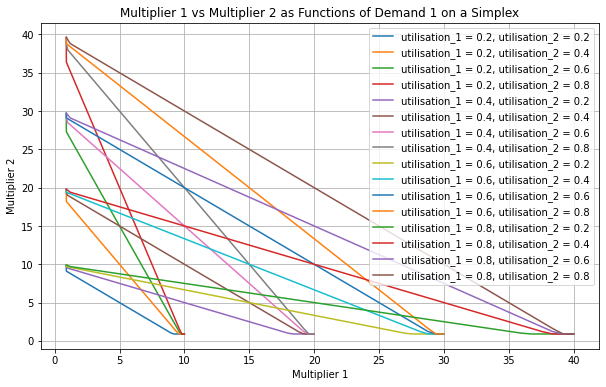

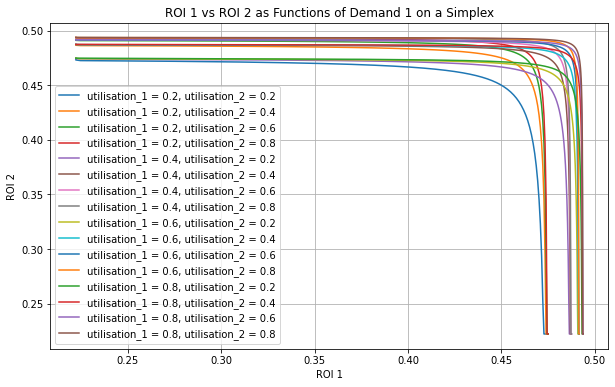

In [29]:
# Define the multiplier functions
def calculate_multiplier_1(utilisation_1, demand_1, demand_2):
    demand = demand_1 + demand_2
    return np.maximum(min_multiplier, max_multiplier * utilisation_1 * demand_1 / demand)

def calculate_multiplier_2(utilisation_2, demand_1, demand_2):
    demand = demand_1 + demand_2
    return np.maximum(min_multiplier, max_multiplier * utilisation_2 * demand_2 / demand)

# Define a range for demand_1 and utilisation values
demand_1_values = np.linspace(0.01, 1, 50)  # Range for demand_1 (demand_2 will be 1 - demand_1)
utilisation_levels = [0.2, 0.4, 0.6, 0.8]  # Different levels of utilisation_1 and utilisation_2

# Plot Multiplier 1 vs Multiplier 2 for different combinations of utilisation levels
plt.figure(figsize=(10, 6))

for utilisation_1 in utilisation_levels:
    for utilisation_2 in utilisation_levels:
        multiplier_1_values = []
        multiplier_2_values = []
        for demand_1 in demand_1_values:
            demand_2 = 1 - demand_1
            multiplier_1 = calculate_multiplier_1(utilisation_1, demand_1, demand_2)
            multiplier_2 = calculate_multiplier_2(utilisation_2, demand_1, demand_2)
            multiplier_1_values.append(multiplier_1)
            multiplier_2_values.append(multiplier_2)
        
        # Plotting Multiplier 1 vs Multiplier 2
        plt.plot(multiplier_1_values, multiplier_2_values, label=f"utilisation_1 = {utilisation_1}, utilisation_2 = {utilisation_2}")

plt.title("Multiplier 1 vs Multiplier 2 as Functions of Demand 1 on a Simplex")
plt.xlabel("Multiplier 1")
plt.ylabel("Multiplier 2")
plt.legend()
plt.grid(True)
plt.show()

# Plot ROI 1 vs ROI 2 for different combinations of utilisation levels
plt.figure(figsize=(10, 6))

for utilisation_1 in utilisation_levels:
    for utilisation_2 in utilisation_levels:
        roi_1_values = []
        roi_2_values = []
        for demand_1 in demand_1_values:
            demand_2 = 1 - demand_1
            multiplier_1 = calculate_multiplier_1(utilisation_1, demand_1, demand_2)
            multiplier_2 = calculate_multiplier_2(utilisation_2, demand_1, demand_2)
            
            # Calculate ROI for each multiplier
            roi_1 = roi(multiplier_1)
            roi_2 = roi(multiplier_2)
            
            # Append to lists
            roi_1_values.append(roi_1)
            roi_2_values.append(roi_2)
        
        # Plotting ROI 1 vs ROI 2
        plt.plot(roi_1_values, roi_2_values, label=f"utilisation_1 = {utilisation_1}, utilisation_2 = {utilisation_2}")

plt.title("ROI 1 vs ROI 2 as Functions of Demand 1 on a Simplex")
plt.xlabel("ROI 1")
plt.ylabel("ROI 2")
plt.legend()
plt.grid(True)
plt.show()

